# Interactive plotting with ipywidgets

When **this notebook is opened**, then select in the menu, Kernel -> Restart & Run all.<br>
This is to refresh the widgets.

* [This noteboook is available at github.com/tlinnet/mybinder_relax](https://github.com/tlinnet/mybinder_relax/blob/master/plot_sin.ipynb)

* [The widgets can be seen at mybinder.org by clicking here](https://mybinder.org/v2/gh/tlinnet/mybinder_relax/master?filepath=plot_sin.ipynb)

This is an illustration of a [damped sine wave](https://en.wikipedia.org/wiki/Damped_sine_wave).

# Table of contents

* [import of code](#importcode)
* [Functions](#func)
* [Damped sine wave widget](#sin_widget)

# Import <a name="importcode"></a>

In [1]:
# Import python packages
import numpy as np
# Set backend. This must be done before importing.
%matplotlib notebook
import matplotlib.pylab as plt

# Widgets
import ipywidgets as w

# Functions <a name="func"></a>
$$y(t) = A \cdot e^{-\lambda t} \cdot \cos{(\omega t + \phi)} $$

In [2]:
def sin_calc(xt=None, A=None, l=None, o=None, p=None):
    """
    @keyword xt:        The array of time points.
    @keyword A:         The initial amplitude of the envelope.
    @keyword l:         l=lambda, the decay constant, in the reciprocal of the time units of the X axis.
    @keyword o:         o=omega, the angular frequency.
    @keyword p:         p=phi, the phase angle at some arbitrary point.
    """
    # Calculate y
    y = A*np.exp(-l*xt)*np.cos(o*xt+p)
    return y

In [3]:
def sin_plot(fig=None, ax=None, 
                Amp_1=1., lambda_1=1., omega_1=2*np.pi, phi_1=0,
                Amp_2=1.5, lambda_2=0.5, omega_2=2*np.pi, phi_2=0
            ):
    """
    @keyword fig:       The matplotlib figure.
    @keyword ax:        The matplotlib axis to plot on.
    @keyword Amp:       The initial amplitude of the envelope.
    @keyword lambd:     lambda, the decay constant, in the reciprocal of the time units of the X axis.
    @keyword omega:     omega, the angular frequency.
    @keyword phi:       phi, the phase angle at some arbitrary point.
    """
    # Make array of time points
    xt = np.linspace(0, 5, num=1000)

    # Gety values
    y_1 = sin_calc(xt=xt, A=Amp_1, l=lambda_1, o=omega_1, p=phi_1)
    y_2 = sin_calc(xt=xt, A=Amp_2, l=lambda_2, o=omega_2, p=phi_2)
    
    # Make label
    label_1 = "Amp=%.1f \nlambda=%.1f \nomega=%.1f \nphi=%.1f"%(Amp_1, lambda_1, omega_1, phi_1)
    label_2 = "Amp=%.1f \nlambda=%.1f \nomega=%.1f \nphi=%.1f"%(Amp_2, lambda_2, omega_2, phi_2)
    
    # Plot
    # Update if already existing
    if ax.lines:
        # Update y-data. x-data is the same.
        ax.lines[0].set_ydata(y_1)
        ax.lines[1].set_ydata(y_2)
        # Update legend
        ax.legend((ax.lines[0], ax.lines[1]), (label_1, label_2), loc='center left', bbox_to_anchor=(1, 0.5))
        # Set axis limits
        p_ylim_up = np.max(np.concatenate((y_1, y_2)))
        # Round up to nearest 2
        p_ylim_up = p_ylim_up + (- p_ylim_up % 2 )
        ax.set_ylim(-p_ylim_up, p_ylim_up)
    # Create new plot, if not existing
    else:
        # Plot
        plt.plot(xt, y_1, label=label_1)
        plt.plot(xt, y_2, label=label_2)
        # Set labels
        ax.set_xlabel("Amplitude")
        ax.set_ylabel("Time")

        # Set axis limits
        p_ylim_up = ax.get_ylim()[-1]
        # Round up to nearest 2
        p_ylim_up = p_ylim_up + (- p_ylim_up % 2 )
        ax.set_ylim(-p_ylim_up, p_ylim_up)
        # x_lim does not change
        ax.set_xlim(xt[0], xt[-1])
        # Put legend outside
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # Update canvas
    fig.canvas.draw()
    return fig

# Damped sine wave <a name="sin_widget"></a>

In [4]:
def make_widget_1():
    fig, ax = plt.subplots(1, figsize=(10, 4))
    widget = w.interactive(sin_plot, fig=w.fixed(fig), ax=w.fixed(ax), 
                        Amp_1=(0.1, 5., 0.1), lambda_1=(0., 5., 0.1), omega_1=(0., 4*np.pi, 0.1), 
                        phi_1=( -round(2*np.pi, 1), round(2*np.pi, 1) ),
                        Amp_2=(0.1, 5., 0.1), lambda_2=(0., 5., 0.1), omega_2=(0., 4*np.pi, 0.1), 
                        phi_2=( -round(2*np.pi, 1), round(2*np.pi, 1) )
                    )
    # Make figure
    return widget

<IPython.core.display.Javascript object>


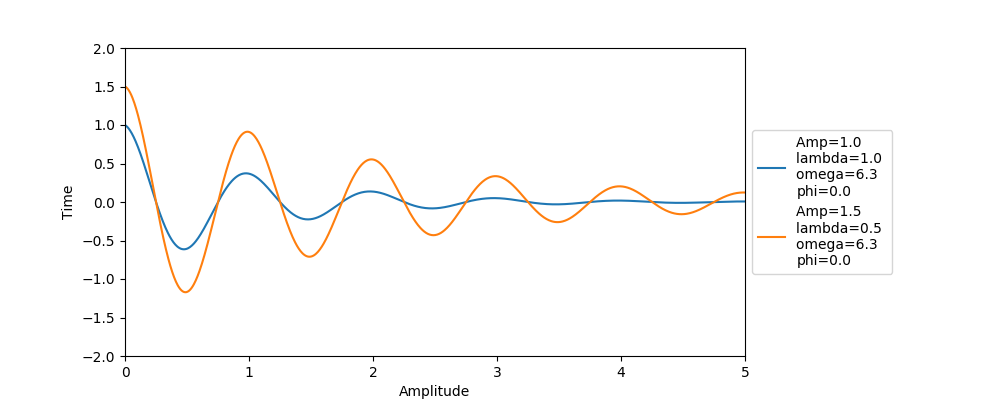

interactive(children=(FloatSlider(value=1.0, description='Amp_1', max=5.0, min=0.1), FloatSlider(value=1.0, description='lambda_1', max=5.0), FloatSlider(value=6.283185307179586, description='omega_1', max=12.566370614359172), FloatSlider(value=0.0, description='phi_1', max=6.3, min=-6.3), FloatSlider(value=1.5, description='Amp_2', max=5.0, min=0.1), FloatSlider(value=0.5, description='lambda_2', max=5.0), FloatSlider(value=6.283185307179586, description='omega_2', max=12.566370614359172), FloatSlider(value=0.0, description='phi_2', max=6.3, min=-6.3), Output()), _dom_classes=('widget-interact',))

In [5]:
widget_1 = make_widget_1()
display(widget_1)

# Arrange widgets

In [6]:
def make_widget_2():
    # Create figure
    fig, ax = plt.subplots(1, figsize=(10, 4))
    # Create for first graph
    A1 = w.FloatSlider(value=1.0, description='A 1', max=5.0, min=0.1)
    l1 = w.FloatSlider(value=1.0, description=r'\(\lambda\) 1', max=5.0)
    o1 = w.FloatSlider(value=2*np.pi, description=r'\(\omega\) 1', max=4*np.pi)
    p1 = w.FloatSlider(value=0.0, description=r'\(\phi\) 1', max=round(2*np.pi, 1), min=-round(2*np.pi, 1))
    # Create for second graph
    Amp_2 = w.FloatSlider(value=1.5, description='A 2', max=5.0, min=0.1)
    l2 = w.FloatSlider(value=0.5, description=r'\(\lambda\) 2', max=5.0)
    o2 = w.FloatSlider(value=2*np.pi, description=r'\(\omega\) 2', max=4*np.pi)
    p2 = w.FloatSlider(value=0.0, description=r'\(\phi\) 2', max=round(2*np.pi, 1), min=-round(2*np.pi, 1))
    # Put sliders under each other
    sliders_1 = w.VBox([A1, l1, o1, p1])
    sliders_2 = w.VBox([Amp_2, l2, o2, p2])
    # Put next to each other
    ui = w.HBox([sliders_1, sliders_2])
    # Match input variables with sliders
    d = {'fig': w.fixed(fig), 'ax': w.fixed(ax), 
         'Amp_1': A1, 'lambda_1': l1,  'omega_1': o1, 'phi_1': p1, 
         'Amp_2': Amp_2, 'lambda_2': l2, 'omega_2': o2, 'phi_2': p2, }
    # Get the output figure
    out = w.interactive_output(sin_plot, d)
    # Make new widget box
    widget = w.VBox([ui, out])
    return widget

<IPython.core.display.Javascript object>


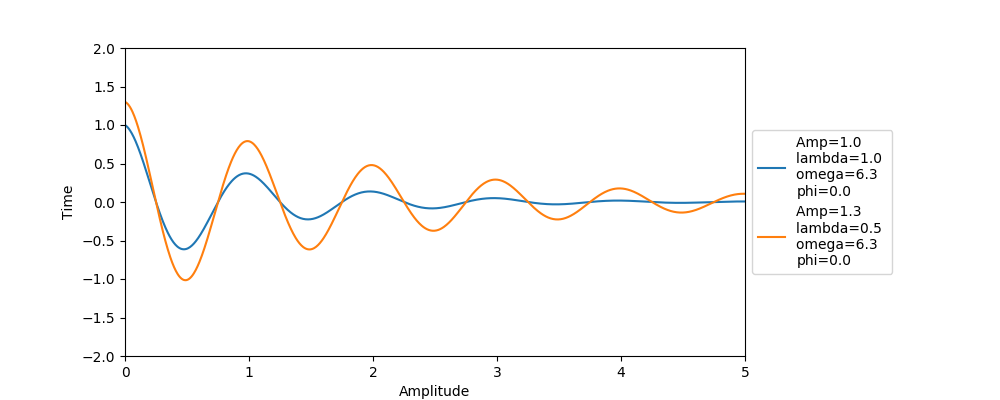

VBox(children=(HBox(children=(VBox(children=(FloatSlider(value=1.0, description='A 1', max=5.0, min=0.1), FloatSlider(value=1.0, description='\\(\\lambda\\) 1', max=5.0), FloatSlider(value=6.283185307179586, description='\\(\\omega\\) 1', max=12.566370614359172), FloatSlider(value=0.0, description='\\(\\phi\\) 1', max=6.3, min=-6.3))), VBox(children=(FloatSlider(value=1.5, description='A 2', max=5.0, min=0.1), FloatSlider(value=0.5, description='\\(\\lambda\\) 2', max=5.0), FloatSlider(value=6.283185307179586, description='\\(\\omega\\) 2', max=12.566370614359172), FloatSlider(value=0.0, description='\\(\\phi\\) 2', max=6.3, min=-6.3))))), Output()))

In [7]:
widget_2 = make_widget_2()
display(widget_2)